In [177]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

wine = datasets.load_wine()

In [178]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)

df_test = pd.concat([df[:5], df[84:89], df[170:175]], axis=0)
df = pd.concat([df[5:84], df[89:170], df[175:178]], axis=0)

# wine_test = np.concatenate([wine.data[:5], wine.data[84:89], wine.data[170:175]], axis=None)
# wine.data = np.concatenate([wine.data[5:84], wine.data[89:170], wine.data[175:178]], axis=None)

target_test = np.concatenate([wine.target[:5], wine.target[84:89], wine.target[170:175]], axis=None)
wine.target = np.concatenate([wine.target[5:84], wine.target[89:170], wine.target[175:178]], axis=None)

In [179]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0
169,13.40,4.60,2.86,25.0,112.0,1.98,0.96,0.27,1.11,8.50,0.67,1.92,630.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [180]:
df['target'] = wine.target
df.target.unique()

array([0, 1, 2])

In [181]:
stds = df.drop(['target'], axis = 1).std()

In [182]:
means = df.drop(['target'], axis = 1).mean()

In [183]:
details = []
for index, element in enumerate(df.drop(['target'], axis = 1)):
  details.append({
      "title": element,
      "std": stds[index],
      "mean": means[index]
  })

details

[{'title': 'alcohol', 'std': 0.8035538630834377, 'mean': 13.00435582822085},
 {'title': 'malic_acid', 'std': 1.113974884783948, 'mean': 2.3360736196319025},
 {'title': 'ash', 'std': 0.2801240109059306, 'mean': 2.3583435582822085},
 {'title': 'alcalinity_of_ash', 'std': 3.33683149776018, 'mean': 19.5},
 {'title': 'magnesium', 'std': 14.4936083246782, 'mean': 99.8159509202454},
 {'title': 'total_phenols',
  'std': 0.6213627450902891,
  'mean': 2.305398773006135},
 {'title': 'flavanoids', 'std': 0.994945603421656, 'mean': 2.047668711656441},
 {'title': 'nonflavanoid_phenols',
  'std': 0.12692086931066845,
  'mean': 0.3609815950920247},
 {'title': 'proanthocyanins',
  'std': 0.5704342454281577,
  'mean': 1.593006134969326},
 {'title': 'color_intensity',
  'std': 2.2996600488388945,
  'mean': 5.023926380368098},
 {'title': 'hue', 'std': 0.22614198332459157, 'mean': 0.9601595092024539},
 {'title': 'od280/od315_of_diluted_wines',
  'std': 0.7049102406140645,
  'mean': 2.6078527607361957},
 {'

In [184]:
def gaussian(x, std, mean):
  return ( 1/( std * np.sqrt( 2 * np.pi ))) * np.exp(- ( 1 / 2 ) * ( (x - mean) / std) ** 2)

x = np.linspace(-50, 50, 1000)
gauss = gaussian(x, 10, 0)

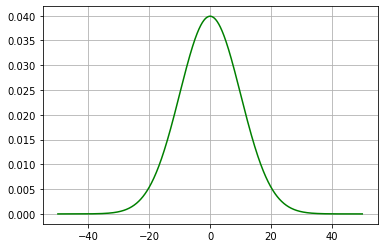

In [185]:
plt.plot(x, gauss, color = 'green')
plt.grid()

In [186]:
df_class_0 = df.loc[df['target'] == 0]    
df_class_1 = df.loc[df['target'] == 1]    
df_class_2 = df.loc[df['target'] == 2]    


In [187]:
df_class_2.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
130,12.86,1.35,2.32,18.0,122.0,1.51,1.25,0.21,0.94,4.10,0.76,1.29,630.0,2
131,12.88,2.99,2.40,20.0,104.0,1.30,1.22,0.24,0.83,5.40,0.74,1.42,530.0,2
132,12.81,2.31,2.40,24.0,98.0,1.15,1.09,0.27,0.83,5.70,0.66,1.36,560.0,2
133,12.70,3.55,2.36,21.5,106.0,1.70,1.20,0.17,0.84,5.00,0.78,1.29,600.0,2
134,12.51,1.24,2.25,17.5,85.0,2.00,0.58,0.60,1.25,5.45,0.75,1.51,650.0,2
135,12.60,2.46,2.20,18.5,94.0,1.62,0.66,0.63,0.94,7.10,0.73,1.58,695.0,2
136,12.25,4.72,2.54,21.0,89.0,1.38,0.47,0.53,0.80,3.85,0.75,1.27,720.0,2
137,12.53,5.51,2.64,25.0,96.0,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515.0,2
138,13.49,3.59,2.19,19.5,88.0,1.62,0.48,0.58,0.88,5.70,0.81,1.82,580.0,2
139,12.84,2.96,2.61,24.0,101.0,2.32,0.60,0.53,0.81,4.92,0.89,2.15,590.0,2


In [188]:
details_class_0 = []
for index, element in enumerate(df_class_0.drop(['target'], axis = 1)):
  details_class_0.append({
      "title": element,
      "std": df_class_0.drop(['target'], axis = 1).std()[index],
      "mean": df_class_0.drop(['target'], axis = 1).mean()[index]
  })

details_class_1 = []
for index, element in enumerate(df_class_1.drop(['target'], axis = 1)):
  details_class_1.append({
      "title": element,
      "std": df_class_1.drop(['target'], axis = 1).std()[index],
      "mean": df_class_1.drop(['target'], axis = 1).mean()[index],
  })

details_class_2 = []
for index, element in enumerate(df_class_2.drop(['target'], axis = 1)):
  details_class_2.append({
      "title": element,
      "std": df_class_2.drop(['target'], axis = 1).std()[index],
      "mean": df_class_2.drop(['target'], axis = 1).mean()[index],
  })

details_class_1

[{'title': 'alcohol', 'std': 0.5415687521328324, 'mean': 12.300454545454546},
 {'title': 'malic_acid',
  'std': 1.0371655048169912,
  'mean': 1.9698484848484852},
 {'title': 'ash', 'std': 0.3198051927429592, 'mean': 2.229848484848484},
 {'title': 'alcalinity_of_ash',
  'std': 3.359073923327324,
  'mean': 20.15909090909091},
 {'title': 'magnesium', 'std': 17.297317791993148, 'mean': 94.81818181818181},
 {'title': 'total_phenols',
  'std': 0.559523961003515,
  'mean': 2.277727272727273},
 {'title': 'flavanoids',
  'std': 0.7261383635898349,
  'mean': 2.1000000000000005},
 {'title': 'nonflavanoid_phenols',
  'std': 0.12598525462245327,
  'mean': 0.3634848484848485},
 {'title': 'proanthocyanins',
  'std': 0.6159310234442049,
  'mean': 1.6316666666666666},
 {'title': 'color_intensity',
  'std': 0.9518065879609053,
  'mean': 3.1156060606060616},
 {'title': 'hue', 'std': 0.20033176445790082, 'mean': 1.0497878787878785},
 {'title': 'od280/od315_of_diluted_wines',
  'std': 0.5049281607837371,
 

In [189]:
feature = 'alcohol'

for index, element in enumerate(details_class_0):
  if element['title'] == feature:
    gauss_class_0 = [gaussian(x, element['std'], element['mean']), element['std'], element['mean']]

for index, element in enumerate(details_class_1):
  if element['title'] == feature:
    gauss_class_1 = [gaussian(x, element['std'], element['mean']), element['std'], element['mean']]

for index, element in enumerate(details_class_2):
  if element['title'] == feature:
    gauss_class_2 = [gaussian(x, element['std'], element['mean']), element['std'], element['mean']]

In [190]:
means = np.array([gauss_class_0[2], gauss_class_1[2], gauss_class_2[2]])
stds = np.array([gauss_class_0[1], gauss_class_1[1], gauss_class_2[1]])

x_minus, x_plus = min(means) - 3*max(stds), max(means) + 3*max(stds)

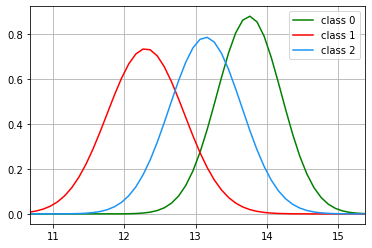

In [191]:
plt.plot(x, gauss_class_0[0], color = 'green', label = 'class 0')
plt.plot(x, gauss_class_1[0], color = 'red', label = 'class 1')
plt.plot(x, gauss_class_2[0], color = '#1b94f7', label = 'class 2')
plt.grid()
plt.xlim(x_minus, x_plus)
plt.legend()

In [192]:
# prior probabilities

P_class_0 = len(df_class_0)/len(df)
P_class_1 = len(df_class_1)/len(df)
P_class_2 = len(df_class_2)/len(df)

In [193]:
details_class_0

[{'title': 'alcohol', 'std': 0.45269701920265454, 'mean': 13.754444444444447},
 {'title': 'malic_acid', 'std': 0.7123007279541592, 'mean': 2.004444444444445},
 {'title': 'ash', 'std': 0.22449454056198867, 'mean': 2.4494444444444445},
 {'title': 'alcalinity_of_ash',
  'std': 2.4634831289223342,
  'mean': 17.074074074074073},
 {'title': 'magnesium', 'std': 10.373678592821825, 'mean': 105.83333333333333},
 {'title': 'total_phenols',
  'std': 0.3248826590299408,
  'mean': 2.827222222222222},
 {'title': 'flavanoids', 'std': 0.4050869755026355, 'mean': 2.976296296296297},
 {'title': 'nonflavanoid_phenols',
  'std': 0.07150571854590301,
  'mean': 0.2896296296296296},
 {'title': 'proanthocyanins',
  'std': 0.39776085367414366,
  'mean': 1.8829629629629634},
 {'title': 'color_intensity',
  'std': 1.2362477464351707,
  'mean': 5.5249999999999995},
 {'title': 'hue', 'std': 0.1183564361656386, 'mean': 1.0674074074074074},
 {'title': 'od280/od315_of_diluted_wines',
  'std': 0.3527929889917896,
  'm

In [194]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [195]:
len(df_test)

15

In [196]:
prob = np.array(df_test[14:15])
prob[0]

array([1.34e+01, 3.91e+00, 2.48e+00, 2.30e+01, 1.02e+02, 1.80e+00,
       7.50e-01, 4.30e-01, 1.41e+00, 7.30e+00, 7.00e-01, 1.56e+00,
       7.50e+02])

In [197]:
L_feature_class_0 = []

for index, element in enumerate(details_class_0):
  L_feature_class_0.append(gaussian(prob[0][index], element['std'], element['mean']))  

L_feature_class_1 = []

for index, element in enumerate(details_class_1):
  L_feature_class_1.append(gaussian(prob[0][index], element['std'], element['mean']))  

L_feature_class_2 = []

for index, element in enumerate(details_class_2):
  L_feature_class_2.append(gaussian(prob[0][index], element['std'], element['mean']))  

In [198]:
L_feature_class_2

[0.6924836587840723,
 0.31899475646691144,
 2.0282524757200253,
 0.14122076621820465,
 0.034996540072492574,
 1.0379133897773207,
 1.3012107273100924,
 3.031814838272422,
 0.8095422254224122,
 0.16846737174505222,
 3.334220537381742,
 1.272802582625713,
 0.002019004716688209]

In [199]:
P_class_0_feature = np.log(P_class_0)

for i in L_feature_class_0:
  P_class_0_feature += np.log(i)

P_class_1_feature = np.log(P_class_1)

for i in L_feature_class_1:
  P_class_1_feature += np.log(i)

P_class_2_feature = np.log(P_class_2)

for i in L_feature_class_2:
  P_class_2_feature += np.log(i)

In [200]:
print([P_class_0_feature, P_class_1_feature, P_class_2_feature])

[-57.341181011238284, -36.466570209280164, -12.78768481754157]


In [201]:
target_test[14:15]

array([2])